<a href="https://colab.research.google.com/github/jt-ut/GaiaREU/blob/main/GaiaREU-ML_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to REU's ML Workshop

Intro

Workflow: Exploratory Data Analysis, Unsupervised vs. Supervised ML

Data Description: Gaia XpSampledMeanSpectrum, briefly discuss pre-processing (unit normalization)

In [16]:
# Read data from web
import pandas as pd
flux = pd.read_csv('https://raw.githubusercontent.com/jt-ut/GaiaREU/main/GaiaREU_flux.csv', header=None)
wvl = pd.read_csv('https://raw.githubusercontent.com/jt-ut/GaiaREU/main/GaiaREU_wvl.csv', header=None)[0]

# Inspect the downloaded data
print(flux.shape)
print(wvl.shape)
print(flux.iloc[0])

In [98]:
%config InlineBackend.figure_format = 'svg'

In [102]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

(3981, 343)
(343,)
0      0.157631
1      0.140994
2      0.124082
3      0.120104
4      0.125592
         ...   
338    0.004656
339    0.004211
340    0.004113
341    0.004181
342    0.004694
Name: 0, Length: 343, dtype: float64


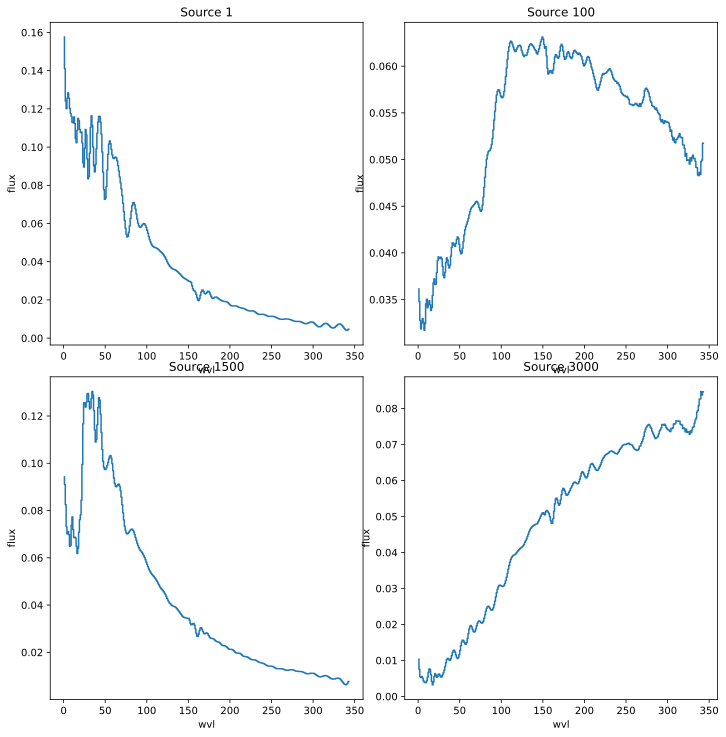

In [108]:
# Visualize a few source spectra
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=10,10
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[0]}), drawstyle='steps-pre', ax=axes[0,0]).set(title='Source 1')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[99]}), drawstyle='steps-pre', ax=axes[0,1]).set(title='Source 100')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[1499]}), drawstyle='steps-pre', ax=axes[1,0]).set(title='Source 1500')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[2999]}), drawstyle='steps-pre', ax=axes[1,1]).set(title='Source 3000')
plt.show()

##Dimensionality Reduction

What we have just done, plotting actual data vectors in their native space, is called ***data visualiation***. Visualizing your data is probably the easiest, and most intuitive, part of ***exploratory data analysis***, which allows us to get a crude summary of what's "going on" in our data. For example, our plots above indicate that the sources in our sample have drastically different spectral profiles.

Does each source have a (meaningfully) different spectra, or are there groups of sources with similar spectra? Since we can't realistically visualize the 343-dimensional spectra of all 3,000+ sources in our sample, we will instead build a *representation* of our data and visualize that. *Dimensionality Reduction* is the process of representing high-dimensional data in a lower dimensional space, usually 2-d or 3-d, for easy visualization. This is also called ***embedding*** our data.

There are many DR algorithms in statistics and machine learning. We introduce a few of the most common below.



In [112]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

(3981, 2)


[Text(0.5, 1.0, '2-d PCA Embedding')]

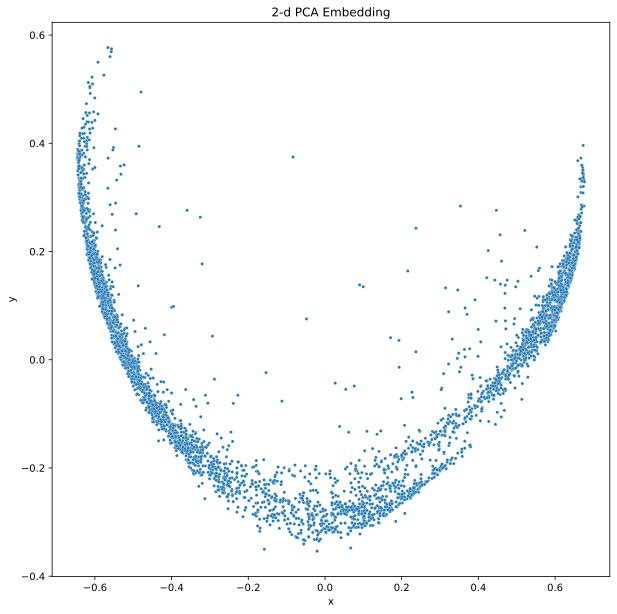

In [113]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # tell PCA to project our 343-d data to 2-d
X_pca = pca.fit_transform(flux) # run the PCA algorithm, transforming to 2-d

# Check that our embedded PCA data is actually 2-d, convert to a data frame for plotting
print(X_pca.shape)
X_pca = pd.DataFrame(X_pca, columns = ['x','y'])

# Visualize the PCA representation of our data
sns.scatterplot(x='x', y='y', data = X_pca, s=10).set(title='2-d PCA Embedding')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3981 samples in 0.010s...
[t-SNE] Computed neighbors for 3981 samples in 0.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3981
[t-SNE] Computed conditional probabilities for sample 2000 / 3981
[t-SNE] Computed conditional probabilities for sample 3000 / 3981
[t-SNE] Computed conditional probabilities for sample 3981 / 3981
[t-SNE] Mean sigma: 0.022490
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.878189
[t-SNE] KL divergence after 1000 iterations: 0.770520


[Text(0.5, 1.0, '2-d t-SNE Embedding')]

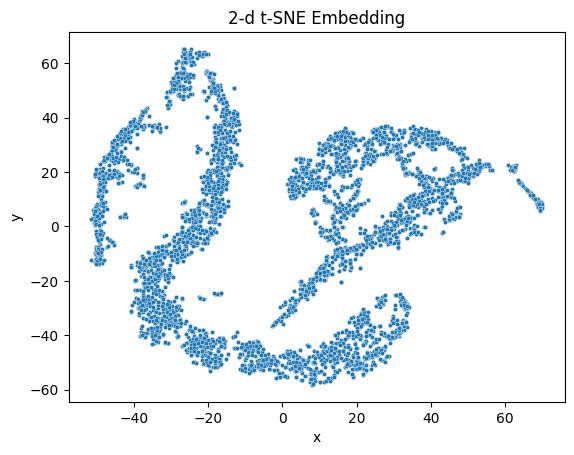

In [43]:
## t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 123, verbose=1, n_jobs=5)
X_tsne = tsne.fit_transform(flux)
X_tsne = pd.DataFrame(X_tsne, columns = ['x','y'])

# Visualize the t-SNE representation of our data
sns.scatterplot(x='x', y='y', data = X_tsne, s=10).set(title='2-d t-SNE Embedding')

## TODO: Change perplexity parameter

In [34]:
!pip install umap-learn

UMAP(n_jobs=2, n_neighbors=30, random_state=123, verbose=True)
Thu Jun 29 15:07:41 2023 Construct fuzzy simplicial set
Thu Jun 29 15:07:53 2023 Finding Nearest Neighbors
Thu Jun 29 15:07:54 2023 Finished Nearest Neighbor Search
Thu Jun 29 15:07:54 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 29 15:08:06 2023 Finished embedding


[Text(0.5, 1.0, '2-d UMAP Embedding')]

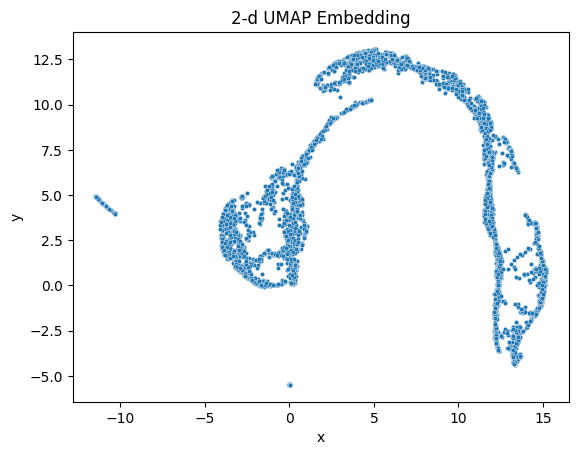

In [80]:
## UMAP
import umap

umap = umap.UMAP(n_neighbors=30, n_components=2, n_jobs = 2, random_state=123, verbose=True)
X_umap = umap.fit_transform(flux)
X_umap = pd.DataFrame(X_umap, columns = ['x','y'])

# Visualize the t-SNE representation of our data
sns.scatterplot(x='x', y='y', data = X_umap, s=10).set(title='2-d UMAP Embedding')

## TODO: Change n_neighbors parameter


In [114]:
import numpy as np
from sklearn.neighbors import KDTree

flux_neighbors = KDTree(flux).query(X=flux, k=30)[1]
pca_neighbors = KDTree(X_pca).query(X=X_pca, k=30)[1]
tsne_neighbors = KDTree(X_tsne).query(X=X_tsne, k=30)[1]
umap_neighbors = KDTree(X_umap).query(X=X_umap, k=30)[1]

prop_pres_pca = 0
prop_pres_tsne = 0
prop_pres_umap = 0
N = flux.shape[0]
for i in range(N):
  prop_pres_pca += np.intersect1d(flux_neighbors[i], pca_neighbors[i]).size / 30
  prop_pres_tsne += np.intersect1d(flux_neighbors[i], tsne_neighbors[i]).size / 30
  prop_pres_umap += np.intersect1d(flux_neighbors[i], umap_neighbors[i]).size / 30

prop_pres_pca /= N
prop_pres_tsne /= N
prop_pres_umap /= N

print("Proportion of k-nearest neighbors preserved: pca = %.2f, t-SNE = %.2f, UMAP = %.2f\n" % (prop_pres_pca, prop_pres_tsne, prop_pres_umap))

Proportion of k-nearest neighbors preserved: pca = 0.46, t-SNE = 0.64, UMAP = 0.59



In [117]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541956 sha256=1eec5a76178f17683594a758e5bf90a6c9960b93682b316bfd23c1522e73f9b7
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [125]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(X_umap)


HDBSCAN()

In [126]:
np.unique(clusterer.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158])

In [138]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2, algorithm = 'kd_tree').fit(X_umap)
np.unique(clustering.labels_)

from sklearn.cluster import MeanShift, estimate_bandwidth
#bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)
ms = MeanShift().fit(X_umap)




In [139]:
np.unique(ms.labels_)

array([0, 1, 2, 3])

In [133]:
import statsmodels.api as sm

dens_u = sm.nonparametric.KDEMultivariate(data=X_pca, var_type='cc', bw='cv_ml')
dens_u.bw

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log


KeyboardInterrupt: ignored

In [140]:
!pip install yellowbrick

In [1]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



#model = KMeans()
model = AgglomerativeClustering(linkage='single')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings= True)
visualizer.fit(X_tsne)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

NameError: ignored